In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
import scipy.stats as ss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )

In [3]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [4]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [6]:
loan_data[loan_data['Gender'].isnull()]

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
59,59,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1
125,125,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,0
133,133,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,0
243,243,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,1
360,360,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,1
410,410,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,1
465,465,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,1
470,470,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,0
475,475,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,1
486,486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1


In [7]:
loan_data['Gender'].value_counts()

Male      393
Female     88
Name: Gender, dtype: int64

In [8]:
loan_data['Gender']=loan_data['Gender'].fillna('Male')

In [9]:
len(loan_data[loan_data['Gender'].isnull()])

0

In [10]:
loan_data[loan_data['Married'].isnull()]

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
41,41,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1


In [11]:
loan_data['Married'].value_counts()

Yes    324
No     166
Name: Married, dtype: int64

In [12]:
loan_data['Married']=loan_data['Married'].fillna('Yes')

In [13]:
loan_data[loan_data['Dependents'].isnull()]

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,11,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0
41,41,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
55,55,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,0
127,127,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
281,281,LP002847,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,0
348,348,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
357,357,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
407,407,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
453,453,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1


In [14]:
loan_data['Dependents'].value_counts()

0     276
1      85
2      78
3+     43
Name: Dependents, dtype: int64

In [15]:
loan_data['Dependents']=loan_data['Dependents'].fillna(0)

In [16]:
loan_data[loan_data['Dependents'].isnull()]

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [17]:
loan_data[loan_data['LoanAmount'].isnull()]

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,104,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,0
146,146,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
157,157,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,0
162,162,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,0
248,248,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban,0
338,338,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,1
347,347,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,0
365,365,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,1
370,370,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,1
388,388,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,0


In [18]:
loan_data=loan_data.drop(422)

In [19]:
loan_data[loan_data['LoanAmount'].isnull()]

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,104,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,0
146,146,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
157,157,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,0
162,162,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,0
248,248,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban,0
338,338,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,1
347,347,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,0
365,365,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,1
370,370,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,1
388,388,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,0


In [20]:
len(loan_data['LoanAmount'].unique())

177

In [21]:
loan_data['LoanAmount'].mean()

145.01473684210526

In [22]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     13
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
Gen={'Male':0,'Female':1}
loan_data['Gender']=[Gen[obj] for obj in loan_data['Gender']]

In [24]:
Mar={'No':0,'Yes':1}
loan_data['Married']=[Mar[obj] for obj in loan_data['Married']]

In [25]:
Grad={'Not Graduate':0,'Graduate':1}
loan_data['Education']=[Grad[obj] for obj in loan_data['Education']]

In [26]:
#loan_data['Self_Employed']=[Mar[obj] for obj in loan_data['Self_Employed']]

In [27]:
loan_data['Dependents'].unique()

array(['0', '3+', '2', '1', 0], dtype=object)

In [28]:
Dep={'0':'0', '3+':'3+', '2':'2', '1':'1', 0:'0'}
loan_data['Dependents']=[Dep[obj] for obj in loan_data['Dependents']]

In [29]:
loan_data=loan_data.drop(['Unnamed: 0', 'Loan_ID'],axis=1)

In [30]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,0,1,3+,0,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,1,1,0,1,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,0,1,0,0,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,0,1,2,1,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [31]:
loan_data=pd.get_dummies(loan_data,columns=['Dependents', 'Property_Area'])

In [32]:
loan_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,No,4547,0.0,115.0,360.0,1.0,1,1,0,0,0,0,1,0
1,0,1,0,Yes,5703,0.0,130.0,360.0,1.0,1,0,0,0,1,1,0,0
2,1,1,1,No,4333,2451.0,110.0,360.0,1.0,0,1,0,0,0,0,0,1
3,0,1,0,Yes,4695,0.0,96.0,NaN,1.0,1,1,0,0,0,0,0,1
4,0,1,1,No,6700,1750.0,230.0,300.0,1.0,1,0,0,1,0,0,1,0


In [33]:
no_null=loan_data[loan_data.isna().any(axis=1)==False]

In [34]:
no_null.isnull().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [35]:
no_null.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,No,4547,0.0,115.0,360.0,1.0,1,1,0,0,0,0,1,0
1,0,1,0,Yes,5703,0.0,130.0,360.0,1.0,1,0,0,0,1,1,0,0
2,1,1,1,No,4333,2451.0,110.0,360.0,1.0,0,1,0,0,0,0,0,1
4,0,1,1,No,6700,1750.0,230.0,300.0,1.0,1,0,0,1,0,0,1,0
5,0,1,0,Yes,4344,736.0,87.0,360.0,1.0,0,1,0,0,0,0,1,0


In [36]:
len(no_null)

398

In [37]:
no_null['Self_Employed'].value_counts()

No     343
Yes     55
Name: Self_Employed, dtype: int64

In [38]:
no_null['Self_Employed']=[Mar[obj] for obj in no_null['Self_Employed']]

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
no_null.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,4547,0.0,115.0,360.0,1.0,1,1,0,0,0,0,1,0
1,0,1,0,1,5703,0.0,130.0,360.0,1.0,1,0,0,0,1,1,0,0
2,1,1,1,0,4333,2451.0,110.0,360.0,1.0,0,1,0,0,0,0,0,1
4,0,1,1,0,6700,1750.0,230.0,300.0,1.0,1,0,0,1,0,0,1,0
5,0,1,0,1,4344,736.0,87.0,360.0,1.0,0,1,0,0,0,0,1,0


In [40]:
Credit_History_test=loan_data[loan_data['Credit_History'].isnull()]

In [41]:
Credit_History_test=Credit_History_test.drop('Credit_History',axis=1)

In [42]:
Credit_History_x=no_null.drop('Credit_History',axis=1)

In [43]:
Credit_History_y=no_null['Credit_History']

In [44]:
reg=LogisticRegression(random_state=123)
reg.fit(Credit_History_x,Credit_History_y)
Credit_History_y_pr=reg.predict(Credit_History_x)
metrics.accuracy_score(Credit_History_y,Credit_History_y_pr)

0.8417085427135679

In [45]:
Credit_History_test['Self_Employed']=Credit_History_test['Self_Employed'].fillna('No')

In [46]:
Credit_History_test.isnull().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Loan_Status                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [47]:
Credit_History_test['Self_Employed']=[Mar[obj] for obj in Credit_History_test['Self_Employed']]

In [48]:
Credit_History_replace=reg.predict(Credit_History_test)

In [49]:
Credit_History_replace

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
len(Credit_History_replace)

42

In [51]:
len(loan_data['Credit_History'][loan_data['Credit_History'].isnull()])

42

In [52]:
nulls = loan_data[pd.isnull(loan_data['Credit_History'])]
for i, ni in enumerate(nulls.index[:len(Credit_History_replace)]):
    loan_data['Credit_History'].loc[ni] = Credit_History_replace[i]

d:\python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
len(loan_data['Credit_History'][loan_data['Credit_History'].isnull()])

0

In [54]:
loan_data.isnull().sum()

Gender                      0
Married                     0
Education                   0
Self_Employed              28
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 15
Loan_Amount_Term           13
Credit_History              0
Loan_Status                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [55]:
Self_Employed_test=loan_data[loan_data['Self_Employed'].isnull()]
Self_Employed_test=Self_Employed_test.drop('Self_Employed',axis=1)

In [56]:
Self_Employed_x=no_null.drop('Self_Employed',axis=1)
Self_Employed_y=no_null['Self_Employed']

In [57]:
Self_Employed_test

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
38,0,1,1,3717,2925.0,151.0,360.0,1.0,0,0,1,0,0,0,1,0
63,0,1,1,3539,1376.0,55.0,360.0,1.0,0,1,0,0,0,1,0,0
79,0,1,1,6256,0.0,160.0,360.0,1.0,1,1,0,0,0,0,0,1
119,0,1,1,4166,3369.0,201.0,360.0,1.0,0,0,1,0,0,0,0,1
132,0,0,0,2550,2042.0,126.0,360.0,1.0,1,1,0,0,0,1,0,0
164,1,0,1,2764,1459.0,110.0,360.0,1.0,1,1,0,0,0,0,0,1
191,1,0,1,3418,0.0,135.0,360.0,1.0,0,1,0,0,0,1,0,0
200,1,0,0,5191,0.0,132.0,360.0,1.0,1,0,1,0,0,0,1,0
201,0,1,0,2894,2792.0,155.0,360.0,1.0,1,1,0,0,0,1,0,0
205,0,1,1,3716,0.0,42.0,180.0,1.0,1,1,0,0,0,1,0,0


In [58]:
reg2=LogisticRegression(random_state=123)
reg2.fit(Self_Employed_x,Self_Employed_y)
Self_Employed_y_pr=reg2.predict(Self_Employed_x)
metrics.accuracy_score(Self_Employed_y,Self_Employed_y_pr)

0.8542713567839196

In [59]:
Self_Employed_test['Loan_Amount_Term'].unique()

array([360., 180.,  nan])

In [60]:
Self_Employed_test['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [61]:
Self_Employed_test['Loan_Amount_Term']=Self_Employed_test['Loan_Amount_Term'].fillna(360)

In [62]:
Self_Employed_test['Loan_Amount_Term'].unique()

array([360., 180.])

In [63]:
Self_Employed_replace=reg2.predict(Self_Employed_test)

In [64]:
Self_Employed_replace

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
nulls2 = loan_data[pd.isnull(loan_data['Self_Employed'])]
for i, ni in enumerate(nulls2.index[:len(Self_Employed_replace)]):
    loan_data['Self_Employed'].loc[ni] = Self_Employed_replace[i]

d:\python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
LoanAmount_test=loan_data[loan_data['LoanAmount'].isnull()]
LoanAmount_test=LoanAmount_test.drop('LoanAmount',axis=1)

In [67]:
LoanAmount_x=no_null.drop('LoanAmount',axis=1)
LoanAmount_y=no_null['LoanAmount']

In [68]:
reg3=LogisticRegression(random_state=123)
reg3.fit(LoanAmount_x,LoanAmount_y)
LoanAmount_y_pr=reg3.predict(LoanAmount_x)
metrics.accuracy_score(LoanAmount_y,LoanAmount_y_pr)

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.03768844221105527

In [69]:
LoanAmount_test['Self_Employed']=[Mar[obj] for obj in LoanAmount_test['Self_Employed']]

In [70]:
LoanAmount_replace=reg3.predict(LoanAmount_test)

In [71]:
nulls3 = loan_data[pd.isnull(loan_data['LoanAmount'])]
for i, ni in enumerate(nulls3.index[:len(LoanAmount_replace)]):
    loan_data['LoanAmount'].loc[ni] = LoanAmount_replace[i]

d:\python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
Loan_Amount_Term_test=loan_data[loan_data['Loan_Amount_Term'].isnull()]
Loan_Amount_Term_test=Loan_Amount_Term_test.drop('Loan_Amount_Term',axis=1)

In [73]:
Loan_Amount_Term_x=no_null.drop('Loan_Amount_Term',axis=1)
Loan_Amount_Term_y=no_null['Loan_Amount_Term']

In [74]:
reg4=LogisticRegression(random_state=123)
reg4.fit(Loan_Amount_Term_x,Loan_Amount_Term_y)
Loan_Amount_Term_y_pr=reg4.predict(Loan_Amount_Term_x)
metrics.accuracy_score(Loan_Amount_Term_y,Loan_Amount_Term_y_pr)

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8417085427135679

In [75]:
LA={'Yes':1, 'No':0, 0:0, 1:1}
Loan_Amount_Term_test['Self_Employed']=[LA[obj] for obj in Loan_Amount_Term_test['Self_Employed']]
Loan_Amount_Term_replace=reg4.predict(Loan_Amount_Term_test)

In [76]:
nulls4 = loan_data[pd.isnull(loan_data['Loan_Amount_Term'])]
for i, ni in enumerate(nulls4.index[:len(Loan_Amount_Term_replace)]):
    loan_data['Loan_Amount_Term'].loc[ni] = Loan_Amount_Term_replace[i]

d:\python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
loan_data.isnull().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [78]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    416
180.0     35
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
36.0       2
60.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [79]:
others=[84,120,240,36,60,12]
for data in others:
    loan_data['Loan_Amount_Term'][loan_data['Loan_Amount_Term'] == data]="Others"

d:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
loan_data['Loan_Amount_Term'].value_counts()

360.0     416
180.0      35
Others     14
480.0      13
300.0      12
Name: Loan_Amount_Term, dtype: int64

In [81]:
loan_data=pd.get_dummies(loan_data,columns=['Loan_Amount_Term'])
loan_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,...,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_180.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_Others
0,1,0,1,No,4547,0.0,115.0,1.0,1,1,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,Yes,5703,0.0,130.0,1.0,1,0,...,0,1,1,0,0,0,0,1,0,0
2,1,1,1,No,4333,2451.0,110.0,1.0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,Yes,4695,0.0,96.0,1.0,1,1,...,0,0,0,0,1,0,0,1,0,0
4,0,1,1,No,6700,1750.0,230.0,1.0,1,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0,1,1,Yes,9833,1833.0,182.0,1.0,1,0,...,0,0,0,0,1,1,0,0,0,0
487,1,0,1,No,3812,0.0,112.0,1.0,1,0,...,0,0,1,0,0,0,0,1,0,0
488,0,1,1,No,14583,0.0,185.0,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
489,0,0,1,No,1836,33837.0,90.0,1.0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [82]:
loan_data['Self_Employed']=[LA[obj] for obj in loan_data['Self_Employed']]

In [83]:
loan_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,...,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_180.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_Others
0,1,0,1,0,4547,0.0,115.0,1.0,1,1,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,1,5703,0.0,130.0,1.0,1,0,...,0,1,1,0,0,0,0,1,0,0
2,1,1,1,0,4333,2451.0,110.0,1.0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,1,4695,0.0,96.0,1.0,1,1,...,0,0,0,0,1,0,0,1,0,0
4,0,1,1,0,6700,1750.0,230.0,1.0,1,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0,1,1,1,9833,1833.0,182.0,1.0,1,0,...,0,0,0,0,1,1,0,0,0,0
487,1,0,1,0,3812,0.0,112.0,1.0,1,0,...,0,0,1,0,0,0,0,1,0,0
488,0,1,1,0,14583,0.0,185.0,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
489,0,0,1,0,1836,33837.0,90.0,1.0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [84]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [85]:
loan_data.loc[detect_outliers(loan_data,['ApplicantIncome','CoapplicantIncome','LoanAmount'])]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,...,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_180.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_Others
18,0,1,1,0,12841,10968.0,349.0,1.0,0,0,...,0,0,0,1,0,0,0,1,0,0
261,0,1,1,0,20833,6667.0,480.0,1.0,1,1,...,0,0,0,0,1,0,0,1,0,0


In [86]:
loan_data=loan_data.drop([18,261])

In [87]:
loan_data.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Status',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Loan_Amount_Term_Others'],
      dtype='object')

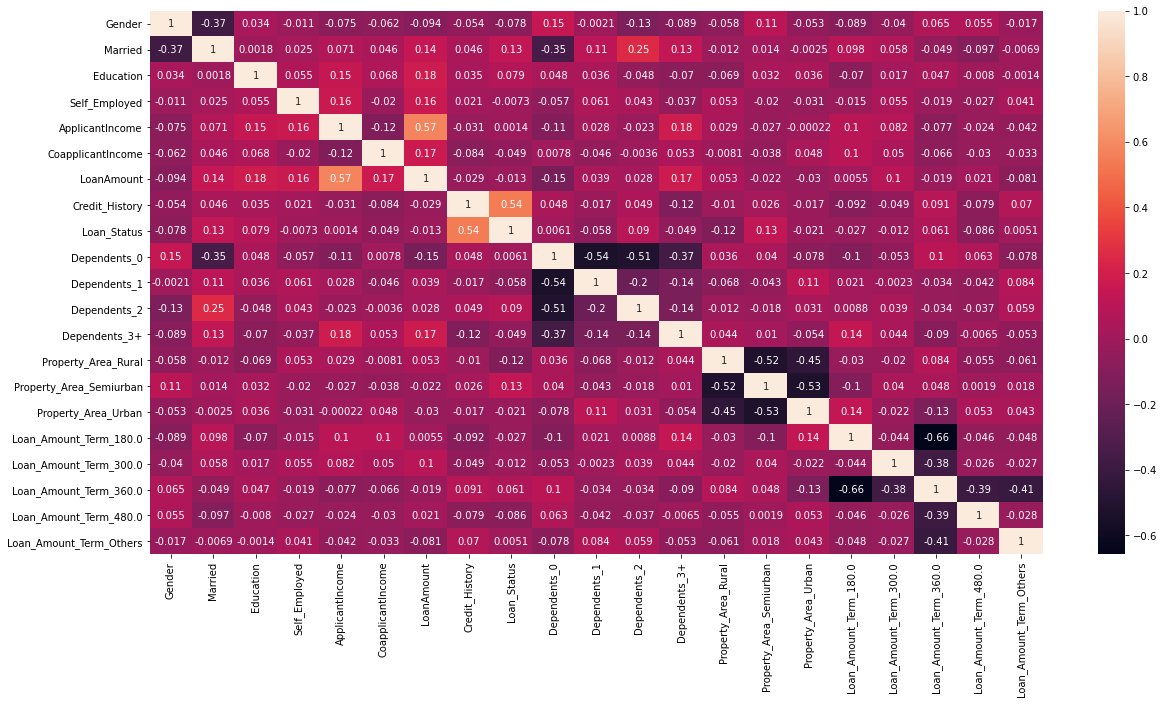

In [88]:
plt.figure(figsize=(20, 10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

In [89]:
x=loan_data.drop('Loan_Status',axis=1)
y=loan_data['Loan_Status']

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [91]:
# Modelling Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [92]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

f1 = []
a1=[]
a2=[]

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    pred2 = clf.predict(x_train)
    f1.append(sklearn.metrics.f1_score(pred , y_test))
    a1.append(sklearn.metrics.accuracy_score(pred , y_test))
    a2.append(sklearn.metrics.accuracy_score(pred2 , y_train))
compare = pd.DataFrame({'Algorithm' : model_names , 'F1_score' : f1,'accuracy' : a1,'train_accuracy':a2})
compare

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\python\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\python\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Algorithm,F1_score,accuracy,train_accuracy
0,LogisticRegression,0.900433,0.843537,0.806452
1,LinearSVM,0.837945,0.721088,0.692082
2,rbfSVM,0.837945,0.721088,0.697947
3,KNearestNeighbors,0.786026,0.666667,0.762463
4,RandomForestClassifier,0.873874,0.809524,1.000000
5,DecisionTree,0.798077,0.714286,1.000000
6,GradientBoostingClassifier,0.875000,0.809524,0.917889
7,GaussianNB,0.903509,0.850340,0.791789
8,LinearDiscriminantAnalysis,0.900433,0.843537,0.809384
9,QuadraticDiscriminantAnalysis,0.881356,0.809524,0.756598


In [93]:
lr = LogisticRegression()
rfe = RFE(estimator=lr, verbose=3)
rfe.fit(x, y)
rfe_df1 = rfe.fit_transform(x, y)

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


In [94]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x.columns)))

Features sorted by their rank:
[(1, 'Credit_History'), (1, 'Dependents_1'), (1, 'Dependents_2'), (1, 'Education'), (1, 'Loan_Amount_Term_180.0'), (1, 'Loan_Amount_Term_480.0'), (1, 'Loan_Amount_Term_Others'), (1, 'Married'), (1, 'Property_Area_Rural'), (1, 'Property_Area_Semiurban'), (2, 'Loan_Amount_Term_360.0'), (3, 'Gender'), (4, 'Self_Employed'), (5, 'Loan_Amount_Term_300.0'), (6, 'Property_Area_Urban'), (7, 'Dependents_0'), (8, 'Dependents_3+'), (9, 'LoanAmount'), (10, 'CoapplicantIncome'), (11, 'ApplicantIncome')]


In [95]:
xrfe=loan_data.drop(['Loan_Status'],axis=1)
xrfe= xrfe[['Credit_History','Dependents_1', 'Dependents_2', 'Education', 'Loan_Amount_Term_180.0', 'Loan_Amount_Term_480.0', 'Loan_Amount_Term_Others', 'Married', 'Property_Area_Rural', 'Property_Area_Semiurban']]
y=loan_data['Loan_Status']

In [96]:
xrfe_train,xrfe_test,yrfe_train,yrfe_test=train_test_split(xrfe,y,test_size=0.3,random_state=123)

In [97]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

f1 = []
a1=[]
a2=[]
for model in range(len(models)):
    clf = models[model]
    clf.fit(xrfe_train,yrfe_train)
    pred = clf.predict(xrfe_test)
    pred2 = clf.predict(xrfe_train)
    f1.append(sklearn.metrics.f1_score(pred , yrfe_test))
    a1.append(sklearn.metrics.accuracy_score(pred , yrfe_test))
    a2.append(sklearn.metrics.accuracy_score(pred2 , yrfe_train))
compare = pd.DataFrame({'Algorithm' : model_names , 'F1_score' : f1,'accuracy' : a1,'train_accuracy':a2})
compare

,Algorithm,F1_score,accuracy,train_accuracy
0,LogisticRegression,0.905172,0.850340,0.806452
1,LinearSVM,0.905172,0.850340,0.806452
2,rbfSVM,0.905172,0.850340,0.803519
3,KNearestNeighbors,0.882096,0.816327,0.800587
4,RandomForestClassifier,0.898678,0.843537,0.832845
5,DecisionTree,0.883929,0.823129,0.832845
6,GradientBoostingClassifier,0.890830,0.829932,0.826979
7,GaussianNB,0.903509,0.850340,0.797654
8,LinearDiscriminantAnalysis,0.905172,0.850340,0.806452
9,QuadraticDiscriminantAnalysis,0.903509,0.850340,0.794721


In [98]:
logistic=LogisticRegression(random_state=123)
logistic.fit(xrfe_train,yrfe_train)
y_train_pred=logistic.predict(xrfe_train)
y_test_pred=logistic.predict(xrfe_test)

In [99]:
print("Train Accuracy:"+str(metrics.accuracy_score(yrfe_train,y_train_pred)))
print("Test Accuracy:"+str(metrics.accuracy_score(yrfe_test,y_test_pred)))

Train Accuracy:0.8064516129032258
Test Accuracy:0.8503401360544217


In [100]:
std_slc = StandardScaler()

In [101]:
pipe = Pipeline(steps=[('std_slc', std_slc), ('logistic_Reg', LogisticRegression(random_state=23))])

In [102]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [103]:
parameters = dict(logistic_Reg__C=C, logistic_Reg__penalty=penalty)

In [104]:
clf_GS = GridSearchCV(pipe, parameters)

In [105]:
clf_GS.fit(x_train, y_train)

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
d:\python\lib\site-packages\sklearn\model_selection\_validation.py:614: F

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('logistic_Reg',
                                        LogisticRegression(random_state=23))]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2']})

In [106]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.019306977288832496
LogisticRegression(C=0.019306977288832496, random_state=23)


In [107]:
y_train_pred2=clf_GS.predict(x_train)
y_test_pred2=clf_GS.predict(x_test)

In [108]:
loan_data['Loan_Status'].value_counts()

1    342
0    146
Name: Loan_Status, dtype: int64

In [109]:
print("Train Accuracy:"+str(metrics.accuracy_score(y_train,y_train_pred2)))
print("Test Accuracy:"+str(metrics.accuracy_score(y_test,y_test_pred2)))

Train Accuracy:0.8035190615835777
Test Accuracy:0.8435374149659864


In [110]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=5)

In [112]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

f1 = []
a1=[]
a2=[]
for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    pred2 = clf.predict(X_train)
    f1.append(sklearn.metrics.f1_score(pred , Y_test))
    a1.append(sklearn.metrics.accuracy_score(pred , Y_test))
    a2.append(sklearn.metrics.accuracy_score(pred2 , Y_train))
compare = pd.DataFrame({'Algorithm' : model_names , 'F1_score' : f1,'accuracy' : a1,'train_accuracy':a2})
compare

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\python\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\python\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Algorithm,F1_score,accuracy,train_accuracy
0,LogisticRegression,0.779817,0.787611,0.770742
1,LinearSVM,0.016949,0.486726,0.482533
2,rbfSVM,0.552995,0.570796,0.580786
3,KNearestNeighbors,0.542714,0.597345,0.777293
4,RandomForestClassifier,0.849315,0.853982,1.000000
5,DecisionTree,0.750000,0.778761,1.000000
6,GradientBoostingClassifier,0.859729,0.862832,0.954148
7,GaussianNB,0.770642,0.778761,0.775109
8,LinearDiscriminantAnalysis,0.875536,0.871681,0.849345
9,QuadraticDiscriminantAnalysis,0.823970,0.792035,0.742358


In [113]:
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(LinearDiscriminantAnalysis(), grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


Mean Accuracy: 0.835
Config: {'solver': 'svd'}


In [114]:
# evaluate model
scores = cross_val_score(search, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

0.8249670619235837

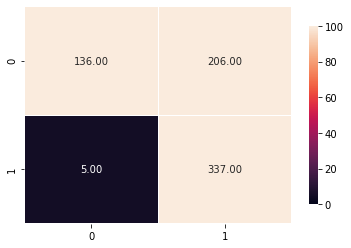

In [115]:
full_pred_try=clf_GS.predict(X)
sns.heatmap(metrics.confusion_matrix(Y,full_pred_try),annot=True,vmin=0.0, vmax=100.0, 
            fmt='.2f',cbar_kws={"shrink": .82},
            linewidths=0.1, )

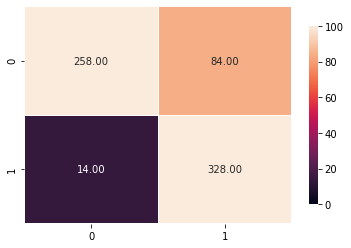

In [116]:
full_pred=search.predict(X)
sns.heatmap(metrics.confusion_matrix(Y,full_pred),annot=True,vmin=0.0, vmax=100.0, 
            fmt='.2f',cbar_kws={"shrink": .82},
            linewidths=0.1, )

In [117]:
import pickle
with open('loan_application_model_deployment.pickle','wb') as f:
    pickle.dump(search,f)

In [118]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}
with open('loan_application_columns_deployment.json',"w") as f:
    f.write(json.dumps(columns))